# Business Problem

Precisely estimate point forecasts of the unit sales of various products sold in the USA by Walmart.

## Why we need machine learning to solve this problem? What are the advantages and disadvantages when we solve this problem using machine learning? 



Inaccurate business forecasts can result huge losses. To improve forecasting accuracy we need to use machine learning in addition to traditional forecasting methods while solving the problem. Compared to traditional demand forecasting methods based upon Statistics or Maths, machine learning has so many advantages like:


1.   it can provide more accurate forecast
2.   identifies hidden trends and patterns present in the data
3.   analyzes more data easily with accelerated data processing speed
4.   can make a robust system 
5.   automates forecast updates based on recent data.


There are few disadvantages too with machine learning models:


1.   Forecasts can never be 100% accurate because of randomness of future unseen data.
2.   Model interpretability can be another issue with some models.



# Loading The Data

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shobhamandal","key":"cbd14cfe3c4beb918aef4dc1698b0258"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
!kaggle competitions download --c 'm5-forecasting-accuracy'

  0% 0.00/101k [00:00<?, ?B/s]
100% 101k/101k [00:00<00:00, 38.3MB/s]
 97% 15.0M/15.5M [00:00<00:00, 38.6MB/s]
100% 15.5M/15.5M [00:00<00:00, 51.6MB/s]
 57% 9.00M/15.8M [00:00<00:00, 26.2MB/s]
100% 15.8M/15.8M [00:00<00:00, 35.7MB/s]
  0% 0.00/163k [00:00<?, ?B/s]
100% 163k/163k [00:00<00:00, 52.1MB/s]
 35% 5.00M/14.2M [00:00<00:00, 38.9MB/s]
100% 14.2M/14.2M [00:00<00:00, 56.4MB/s]


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
#calendar data
calendar=pd.read_csv(r"calendar.csv")

In [8]:
#create a directortry called train_sales
!mkdir train_sales
#unzip sales_train_evaluation.csv.zip and move it to directory named train_sales
!unzip sales_train_evaluation.csv.zip -d train_sales
train_sales=pd.read_csv(r"train_sales/sales_train_evaluation.csv")

Archive:  sales_train_evaluation.csv.zip
  inflating: train_sales/sales_train_evaluation.csv  


In [9]:
#Validation sell
!mkdir validation_sales
!unzip sales_train_validation.csv.zip -d validation_sales
validation_sales = pd.read_csv(r"validation_sales/sales_train_validation.csv")

Archive:  sales_train_validation.csv.zip
  inflating: validation_sales/sales_train_validation.csv  


In [10]:
#sell_price
!mkdir sell_prices
!unzip sell_prices.csv.zip -d sell_prices
sell_price_data=pd.read_csv("sell_prices/sell_prices.csv")

Archive:  sell_prices.csv.zip
  inflating: sell_prices/sell_prices.csv  


In [12]:
sell_price_data=pd.read_csv("sell_prices/sell_prices.csv")

In [13]:
#List all the files
!ls

calendar.csv			sample_data		   train_sales
kaggle.json			sample_submission.csv.zip  validation_sales
sales_train_evaluation.csv.zip	sell_prices
sales_train_validation.csv.zip	sell_prices.csv.zip


In [14]:
#calendar information
print(calendar.columns)
calendar.head()

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


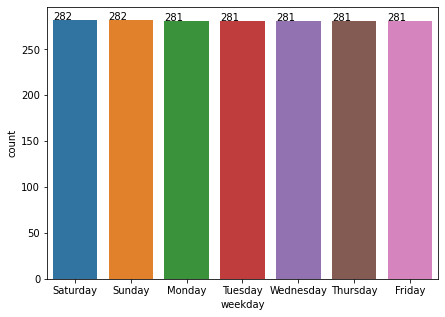

In [15]:
plt.figure(figsize=(7,5))
ax=sns.countplot(x=calendar.weekday)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x(),bar.get_height()))
plt.show()



*   There are 282 Saturdays, 282 Sundays and rest each counts to 281.
*   Datset is balanced in terms of number of days present.




Total number of unique events in event_name_1 is 31


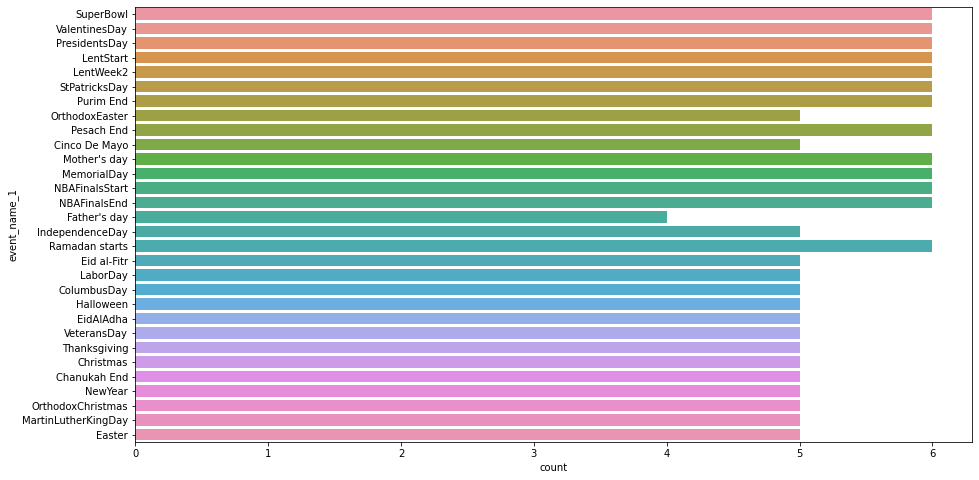

In [ ]:
#All about event_name_1
print("Total number of unique events in event_name_1 is",len(calendar.event_name_1.unique()) )
plt.figure(figsize=(15,8))
sns.countplot(y=calendar.event_name_1)
plt.show()



*   This plot shows number of unique events presents under event_name_1
*   Event "Fathers's day" occured least and only 4 times.
*   Total 13 events inculding "SuperBowl", "ValentinesDay", "PresidentsDay", "Mother's day" occured most and 13 times.






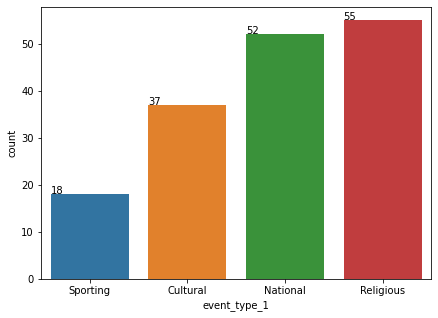

In [ ]:
#All about event_type_1
plt.figure(figsize=(7,5))
ax=sns.countplot(x=calendar.event_type_1)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x(),bar.get_height()))
plt.show()



*   This plot shows types of event_name_1.
*   Type "Religious" occured 55 times which is the highest among all and type "Sporting" occured least, only for 18 times.







Total number of unique events in event_name_1 is 5


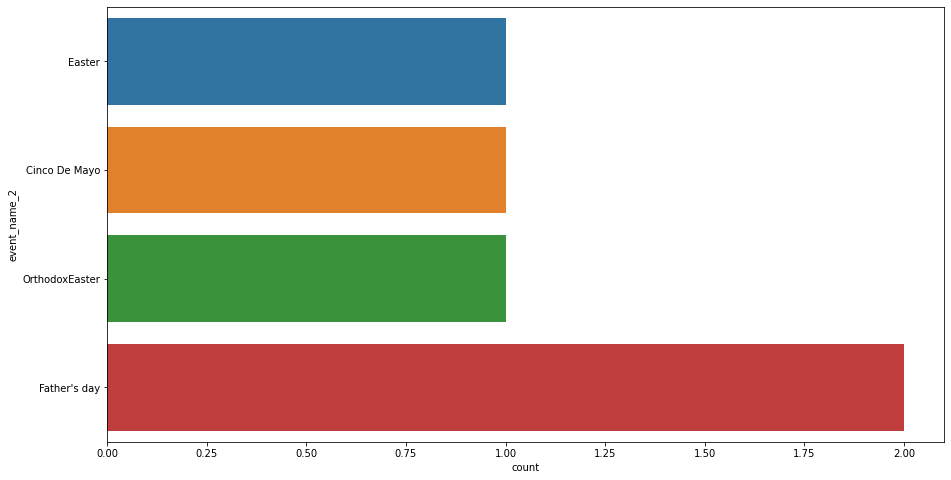

In [ ]:
#All about event_name_2
print("Total number of unique events in event_name_1 is",len(calendar.event_name_2.unique()) )
plt.figure(figsize=(15,8))
sns.countplot(y=calendar.event_name_2)
plt.show()



*   In this plot also we can see that event "Father's day" occured most, 2 times.
*   Occurances of each event under event_name_2 are very less, either only once or twice.


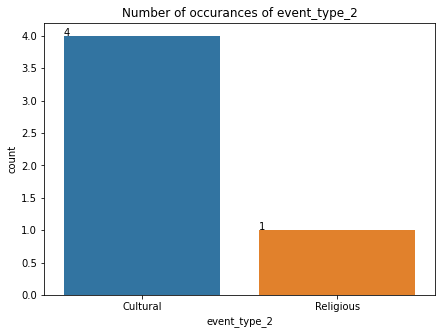

In [ ]:
#All about event_type_2
plt.figure(figsize=(7,5))
ax=sns.countplot(x=calendar.event_type_2)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x(),bar.get_height()))

plt.title("Number of occurances of event_type_2")
plt.show()



*   "Cultural" event happened four times and "Religious" only one time.
*   As the number of events is lesser under event_name_2, types of event_type_2 is also very less.



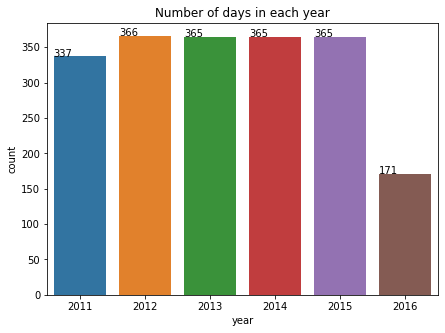

In [ ]:
#Year wise date counts from calendar dataset
plt.figure(figsize=(7,5))
ax=sns.countplot(x='year',data=calendar)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x(),bar.get_height()))

plt.title("Number of days in each year")
plt.show()



*   The years 2012-2015, all the days' sales data are present.
*   For the year 2016, around 5 months' data is present.



In [ ]:
#null values in calendar
calendar.isna().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64


*   There are some dates when no events no happened. Fill them by 'no_event_happened'.

In [ ]:
#Fill null values of calendar df
calendar=calendar.fillna('no_event_happened')
calendar.isna().sum()

date            0
wm_yr_wk        0
weekday         0
wday            0
month           0
year            0
d               0
event_name_1    0
event_type_1    0
event_name_2    0
event_type_2    0
snap_CA         0
snap_TX         0
snap_WI         0
dtype: int64



*   We can see that there is no null values present in the calendar file. 




In [ ]:
print(train_sales.info())
print("="*100)
print(train_sales.columns)
print("="*100)
train_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1947 entries, id to d_1941
dtypes: int64(1941), object(6)
memory usage: 452.9+ MB
None
Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1932', 'd_1933', 'd_1934', 'd_1935', 'd_1936', 'd_1937', 'd_1938',
       'd_1939', 'd_1940', 'd_1941'],
      dtype='object', length=1947)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


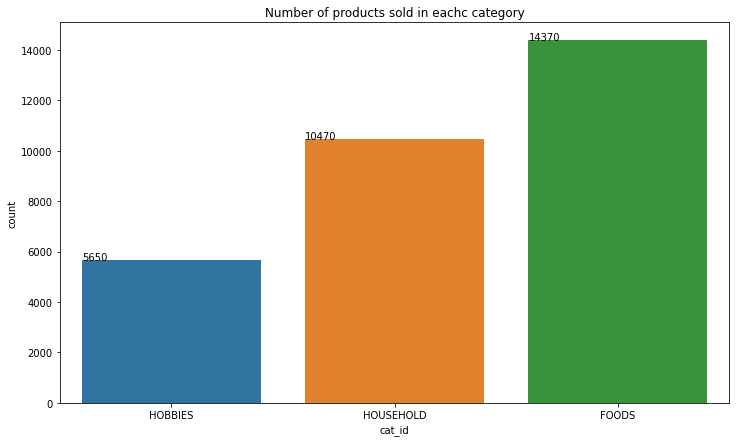

In [ ]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x=train_sales.cat_id)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x(),bar.get_height()))
plt.title("Number of products sold in eachc category")
plt.show()



*   Products under category name "FOODS" sold most wheras "HOBBIES" least.




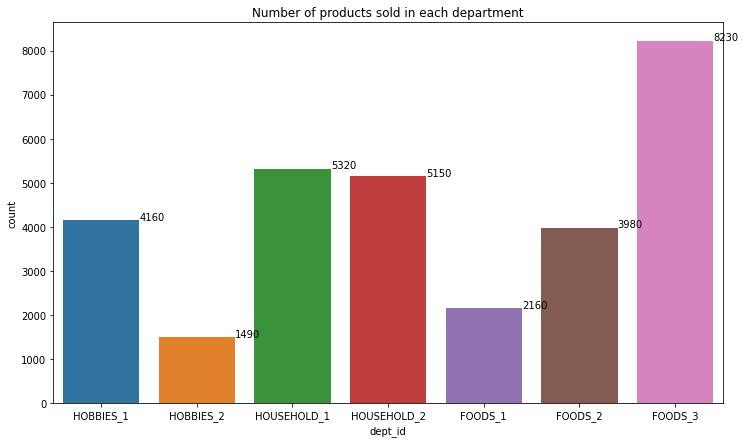

In [ ]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x=train_sales.dept_id)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x()+bar.get_width(),bar.get_height()))
    
plt.title("Number of products sold in each department")
plt.show()



*   List item
*   List item



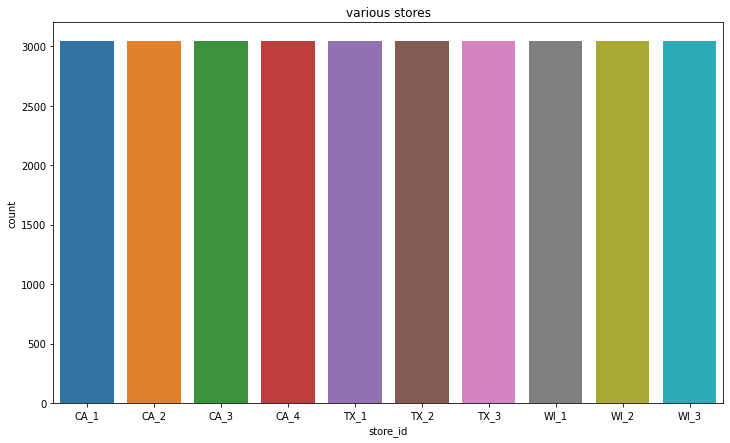

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(x=train_sales.store_id)
plt.title("various stores")
plt.show()

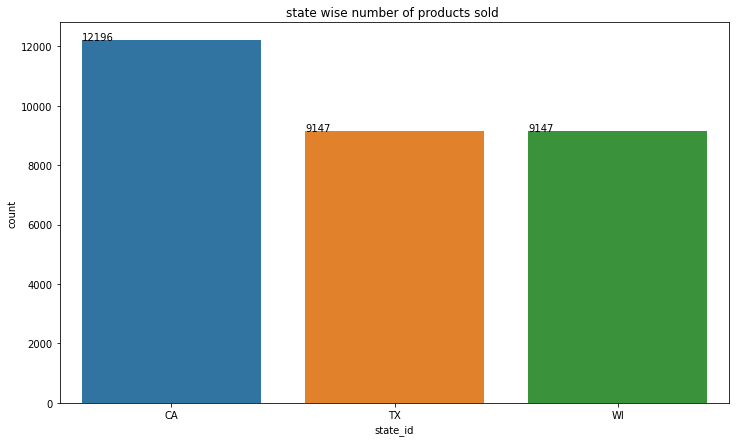

In [ ]:
plt.figure(figsize=(12,7))
ax=sns.countplot(x=train_sales.state_id)
for bar in ax.patches:
    ax.annotate(bar.get_height(), xy=(bar.get_x(), bar.get_height()) )
plt.title("state wise number of products sold ")
plt.show()

In [ ]:
print(sell_price_data.info())
print("="*100)
print(sell_price_data.columns)
print("="*100)
print(sell_price_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB
None
Index(['store_id', 'item_id', 'wm_yr_wk', 'sell_price'], dtype='object')
  store_id        item_id  wm_yr_wk  sell_price
0     CA_1  HOBBIES_1_001     11325        9.58
1     CA_1  HOBBIES_1_001     11326        9.58
2     CA_1  HOBBIES_1_001     11327        8.26
3     CA_1  HOBBIES_1_001     11328        8.26
4     CA_1  HOBBIES_1_001     11329        8.26


In [ ]:
#Check percentiles
for i in range(10,110,10):
    k=np.percentile(sell_price_data.sell_price,i)
    print("{}th percentile value of sales is {}".format(i,k))

10th percentile value of sales is 1.24
20th percentile value of sales is 1.97
30th percentile value of sales is 2.48
40th percentile value of sales is 2.88
50th percentile value of sales is 3.47
60th percentile value of sales is 3.98
70th percentile value of sales is 4.98
80th percentile value of sales is 6.27
90th percentile value of sales is 8.64
100th percentile value of sales is 107.32


In [ ]:
#As there seems to be presence outlier just zoom in 90th-100th percentile
for i in range(90,101,1):
    k=np.percentile(sell_price_data.sell_price,i)
    print("{}th percentile value of sales is {}".format(i,k))

90th percentile value of sales is 8.64
91th percentile value of sales is 8.97
92th percentile value of sales is 9.47
93th percentile value of sales is 9.92
94th percentile value of sales is 9.98
95th percentile value of sales is 10.98
96th percentile value of sales is 11.88
97th percentile value of sales is 12.87
98th percentile value of sales is 14.48
99th percentile value of sales is 17.92
100th percentile value of sales is 107.32


In [19]:
#again zoom in the range
for i in np.arange(99,100.1,0.1):
    k=np.percentile(sell_price_data.sell_price,i)
    print("{}th percentile value of sales is {}".format(i,k))

99.0th percentile value of sales is 17.92
99.1th percentile value of sales is 17.97
99.19999999999999th percentile value of sales is 17.97
99.29999999999998th percentile value of sales is 17.97
99.39999999999998th percentile value of sales is 18.97
99.49999999999997th percentile value of sales is 19.54
99.59999999999997th percentile value of sales is 19.98
99.69999999999996th percentile value of sales is 20.53
99.79999999999995th percentile value of sales is 23.98
99.89999999999995th percentile value of sales is 28.96
99.99999999999994th percentile value of sales is 107.32


**Observation:** Outlier is present at 100th pecentile

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


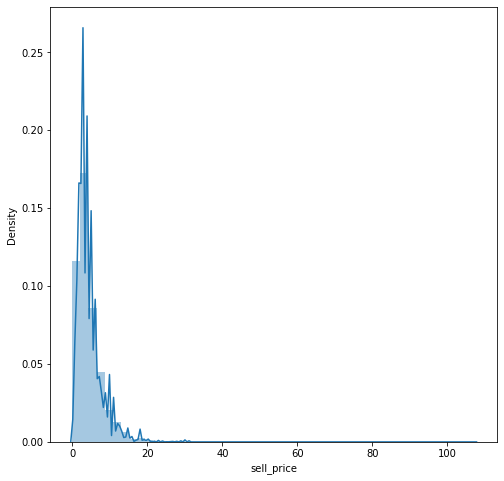

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(sell_price_data.sell_price, hist=True, bins=int(100/2), kde=True)
plt.show()

In [ ]:
print(validation_sales.columns)
print("="*100)
validation_sales.head()

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1904', 'd_1905', 'd_1906', 'd_1907', 'd_1908', 'd_1909', 'd_1910',
       'd_1911', 'd_1912', 'd_1913'],
      dtype='object', length=1919)


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [ ]:
#Unique elements in each files
print('Unique states:',len(train_sales['state_id'].unique()))
print('Unique stores:',len(train_sales['store_id'].unique()))
print('Unique categories:',len(train_sales['cat_id'].unique()))
print('Unique deptartments:',len(train_sales['dept_id'].unique()))
print('Unique items:',len(train_sales['item_id'].unique()))

Unique states: 3
Unique stores: 10
Unique categories: 3
Unique deptartments: 7
Unique items: 3049


#### There are 10 stores in 3 states: CA(California), TX(Texas), WI(Wisconsin) devided in 3 categories and 7 subcategories(departments).

In [ ]:
!ls

calendar.csv			sample_data		   train_sales
kaggle.json			sample_submission.csv.zip  validation_sales
sales_train_evaluation.csv.zip	sell_prices
sales_train_validation.csv.zip	sell_prices.csv.zip


# EDA

In [ ]:
#https://www.programiz.com/python-programming/type-conversion-and-casting
import plotly.express as px
days = [j for j in train_sales.columns if 'd_' in j]
day_wise_sales = train_sales[days].sum() #taking only data which has daily sales and summing them up
date=calendar['date'][:1941] #As train_sales has no date,we are importing dates from calendar file
fig = px.line(x=date, 
              y=day_wise_sales,
              labels={"x": "Years","y": "Sales"},
              title="Day wise sales")
fig.show()



1.   There is periodicity present in the sales data.
2.   There is seasonal trend also present.
3.   In the ending of each year sales decrease which is true for each year.




### State wise sales trend

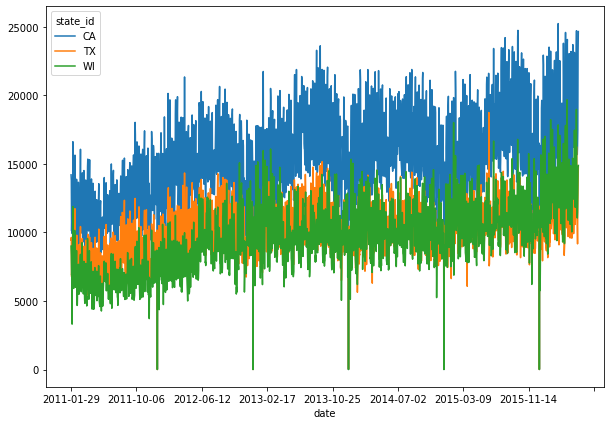

In [ ]:
states_only = train_sales.drop(['id','item_id','dept_id','store_id','cat_id'],axis=1).groupby('state_id').sum()
states_only.columns=  calendar['date'].head(1941)
states_only.transpose().plot(figsize=(10,7))

**Observation:** It can be seen that state CA has highest sales and WI has the lowest.

### store wise sales trend

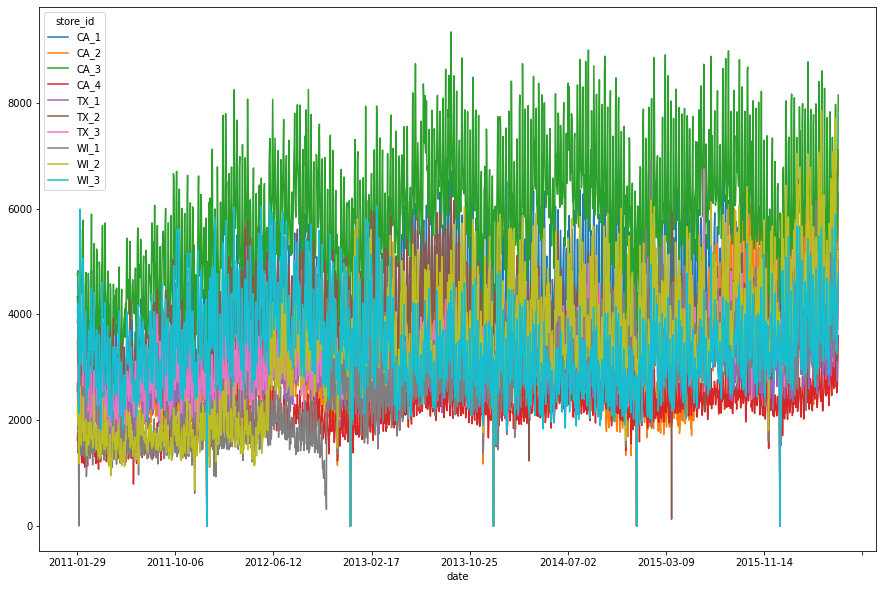

In [ ]:
stores_only=train_sales.drop(['id', 'item_id','dept_id', 'cat_id'], axis=1).groupby('store_id').sum()
stores_only.columns = calendar['date'].head(1941)
stores_only.transpose().plot(figsize=(15,10))

**Observation:**One store from the state CA i.e. CA_3 made it to the top most place in terms of selling.

### sales pattern based on different categories

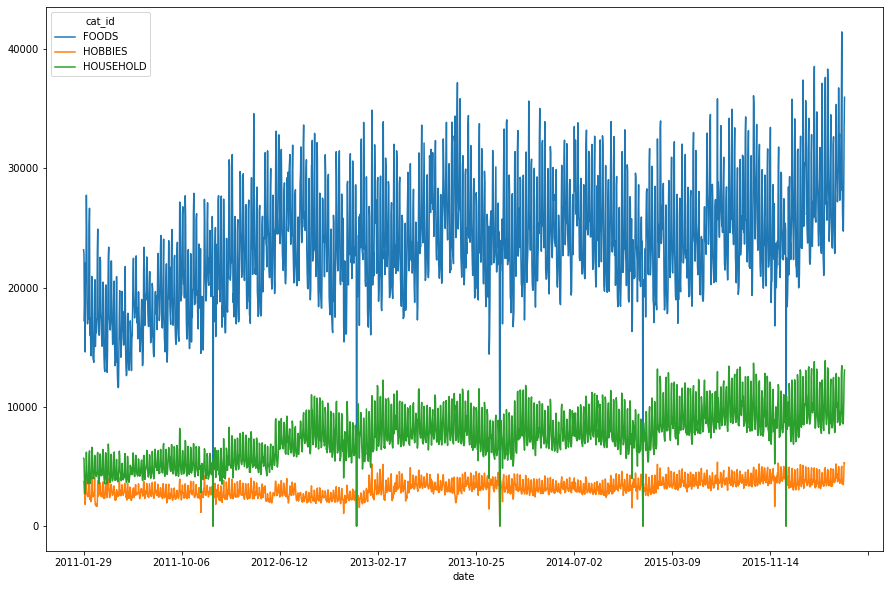

In [ ]:
cat_only=train_sales.drop(['id', 'item_id','dept_id', 'store_id'], axis=1).groupby('cat_id').sum()
cat_only.columns = calendar['date'].head(1941)
cat_only.transpose().plot(figsize=(15,10))

**Observation:**'Food' is the most sold item whereas 'Houshold' is least.

### sales pattern based on department id

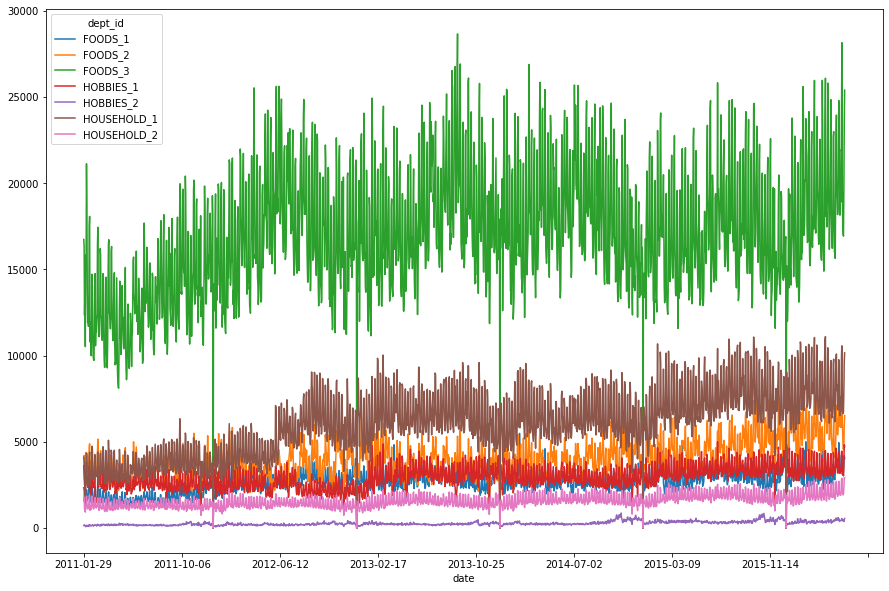

In [ ]:
dep_only=train_sales.drop(['id', 'item_id','store_id', 'cat_id'], axis=1).groupby('dept_id').sum()
dep_only.columns = calendar['date'].head(1941)
dep_only.transpose().plot(figsize=(15,10))

### Month wise sales in each year

In [ ]:
#Refer:https://github.com/AmithPVernekar/M5-Forecasting-Accuracy/blob/main/EDA_M5_Forecating_Case_Study.ipynb
import plotly.graph_objects as go

month = {1:"Jan",2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
days_columns = [i for i in train_sales.columns if 'd_' in i]
sales = train_sales[days_columns].sum()
df = pd.DataFrame()

#The dataframe does not contain whole month data for couple of months.They are 
#1.first month of 2011(Janauary) : contains only sales of date 29,30 and 31(only 3 days data)
#2.fifth month of 2016(May) : contains only sales of date from 1 to 22 (only 22 days data)
# For plotting we excluded these month data . So slicing the dataframe with starting position 3 and ending position 1919

df['sales'] = sales[3:1919]
df['month'] = list(calendar['month'][3:1919])
df['year'] = list(calendar['year'][3:1919])
df1=df.groupby(['month','year'])['sales'].sum().unstack()
df1.index=df1.index.map(month)

fig = go.Figure()
for i in df1.columns:
    fig.add_trace(go.Scatter(x=df1.index, y=df1[i],
                    mode='lines+markers',
                    name=i))
fig.update_layout(title='Month wise sales in each year', title_x=0.5,width=1000,height=500,xaxis_title="month",yaxis_title="sales")
fig.show()

**Observation**

*   In year, sales expands compared to the previous year.
*   In each year in the month of November, sales decrease to certain extent than that of October. In December it again shows upward pattern. 



## Rolling averages

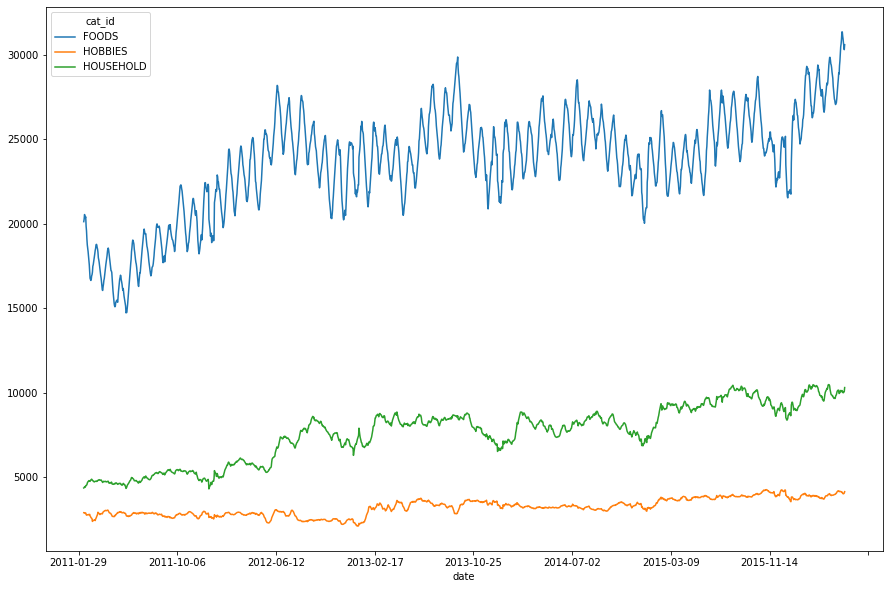

In [ ]:
#Category wise 14 days rolling mean
cat_only.transpose().rolling(window=14).mean().plot(figsize=(15,10));

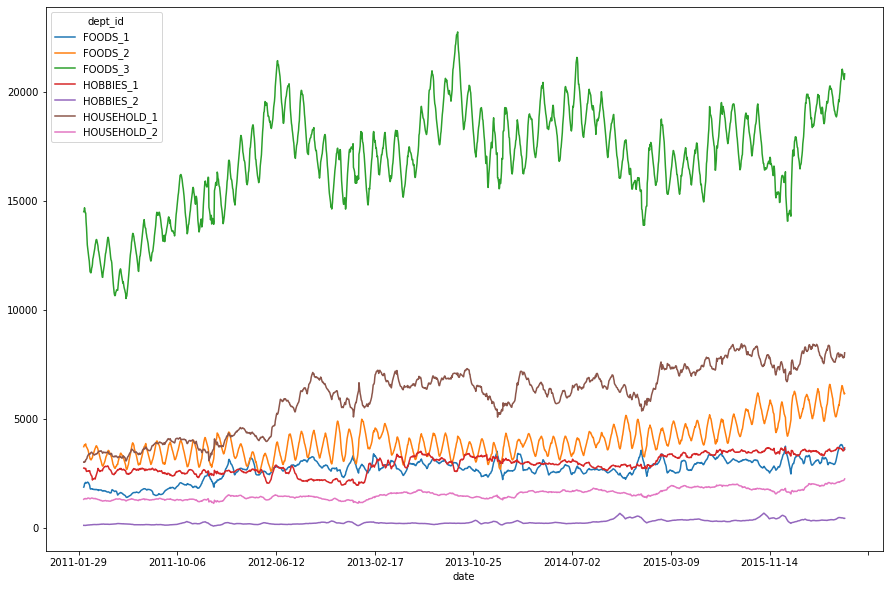

In [ ]:
#Department wise 14 days rolling mean
dep_only.transpose().rolling(window=14).mean().plot(figsize=(15,10));

**Observation:** Prominent seasonal trends can be visible in each plot, although the oscillation rate is different.

In [ ]:
def plot_rolling_avg(attribute_name, Title,width=600,height=500):
    days=[i for i in train_sales.columns if 'd_' in i]
    past_sales = train_sales.set_index('id')[days] .T .merge(calendar.set_index('d')['date'],left_index=True,right_index=True,validate='1:1')
    past_sales=past_sales.set_index('date')

    fig=go.Figure()

    for j in attribute_name:
        item_list=[psc for psc in past_sales.columns if j in psc]
        data=past_sales[item_list].sum(axis=1).rolling(60).mean()
        fig.add_trace(go.Box(x=[j]*len(data), y=data, name=j))

    
    fig.update_layout(yaxis_title="Sales", xaxis_title="Time", title=Title,width=width, height=height)
    fig.show()

In [ ]:
#Rolling avg for different states
attribute_name=set(train_sales['state_id'])
Title="60 days Rolling avg. sales for different states"
plot_rolling_avg(attribute_name, Title,width=800,height=500)

In [ ]:
#Rolling avg for different stores
attribute_name=set(train_sales['store_id'])
Title="60 days Rolling avg. sales for different stores"
plot_rolling_avg(attribute_name, Title,width=800,height=500)

**Observation:** Store CA_3 has maximum sales as it was seen earlier also.

In [ ]:
#Rolling avg for different categories
attribute_name=set(train_sales['cat_id'])
Title="60 days Rolling avg. sales for different categories"
plot_rolling_avg(attribute_name, Title,width=800,height=500)

In [ ]:
#Rolling avg for different departments
attribute_name=set(train_sales['dept_id'])
Title="60 days Rolling avg. sales for different departments"
plot_rolling_avg(attribute_name, Title,width=800,height=500)

**Observation:**
FOODS_3 has the maximum sales and HOBBIES_2 has the minimum sales.




In [ ]:
event_df= calendar.drop_duplicates(['event_name_1','event_type_1', 'event_name_2','event_type_2'])
event_df= event_df[['event_name_1','event_type_1', 'event_name_2','event_type_2']]

def plot_avg_sale_event_wise(event_df):
    for event in event_df.columns:
        day=[i for i in train_sales.columns if 'd_' in i]
        days=pd.DataFrame(train_sales[day].sum())
        part_of_cal=calendar[[event, 'd']]
        df_new=days.merge(part_of_cal, left_index=True, right_on='d').set_index('d')
        df_new=df_new.groupby(event).mean().T.mean()

        y=[str(np.round(i/df_new.sum()*100,2)) + '%' for i in df_new.values]
        fig = px.bar(x=df_new.index, y=df_new.values, labels={'x':"Events","y":'Percent Sales'}, color=df_new.index,text=df_new.astype(int))
        #fig.update_traces(textposition='outside')
        Title="Average sales for " + str(event)
        fig.update_layout(showlegend=True, title=Title, title_x=0.5, width=1000, height=700)
        fig.show()


In [ ]:
plot_avg_sale_event_wise(event_df)

**Observation**


*   We can see that considering event_name_1, labour day has highest average sale whereas Chritmas day has lowest sale.
*   In case of event_type_1, 'Sporting' has highest sales and 'National' has lowest average sale.
*   In case of event_name_2, on the day of 'Cinco de mayo' highest sales take place and on 'easter' lowest.
*   Considering event_type_2, 'Religious' has the highest sale.





# Feature Engineering

### NAN values



*   NAN values of calender file have already been taken care of.
*   Let's check other files.



In [ ]:
print("Number of Nan values in train_sales file:",train_sales.isna().sum().sum())
print("Number of Nan values in validation_sales file:", validation_sales.isna().sum().sum())
print("Number of Nan values in sell_price_data file:", sell_price_data.isna().sum().sum())


Number of Nan values in train_sales file: 0
Number of Nan values in validation_sales file: 0
Number of Nan values in sell_price_data file: 0


So there is no NAN values left in the dataset.

## 4.2 Downcasting the data

In [ ]:
#Downcast in order to save memory
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):

        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)

        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
                
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

In [ ]:
sales_mem=np.round(train_sales.memory_usage().sum()/(1024*1024),2)
calendar_mem = np.round(calendar.memory_usage().sum()/(1024*1024),2)
price_mem = np.round(sell_price_data.memory_usage().sum()/(1024*1024),2)
print("Before downcasting memory used by train_sales: {}MB".format(sales_mem))
print("Before downcasting memory used by calendar: {}MB".format(calendar_mem))
print("Before downcasting memory used by sell_price_data: {}MB".format(price_mem))

Before downcasting memory used by train_sales: 452.9MB
Before downcasting memory used by calendar: 0.2MB
Before downcasting memory used by sell_price_data: 208.8MB


In [ ]:
#After downcasting
train_sales = downcast(train_sales)
sell_price_data = downcast(sell_price_data)
calendar = downcast(calendar)
#Check memery usage
sales_mem=np.round(train_sales.memory_usage().sum()/(1024*1024),2)
calendar_mem = np.round(calendar.memory_usage().sum()/(1024*1024),2)
price_mem = np.round(sell_price_data.memory_usage().sum()/(1024*1024),2)
print("After downcasting memory used by train_sales: {}MB".format(sales_mem))
print("After downcasting memory used by calendar: {}MB".format(calendar_mem))
print("After downcasting memory used by sell_price_data: {}MB".format(price_mem))

After downcasting memory used by train_sales: 96.6MB
After downcasting memory used by calendar: 0.1MB
After downcasting memory used by sell_price_data: 45.8MB


## 4.3 Melting and merging the data

In [ ]:
#https://medium.com/@durgaswaroop/reshaping-pandas-dataframes-melt-and-unmelt-9f57518c7738

# reframing the sales(sales_train_evaluation.csv) dataframe in such a way that it can be merged with other csv files.
d_train = pd.melt(train_sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                  var_name='day', 
                  value_name='sales_demand')

In [ ]:
# merging cal dataframe with data dataframe
d_train = pd.merge(d_train, calendar, left_on='day', right_on='d')

In [ ]:
d_train.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,day,sales_demand,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event_happened,no_event_happened,no_event_happened,no_event_happened,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event_happened,no_event_happened,no_event_happened,no_event_happened,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event_happened,no_event_happened,no_event_happened,no_event_happened,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event_happened,no_event_happened,no_event_happened,no_event_happened,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event_happened,no_event_happened,no_event_happened,no_event_happened,0,0,0


In [ ]:
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [ ]:
#Final training data
d_train=pd.merge(d_train, sell_price_data, 
                 left_on=['store_id','item_id','wm_yr_wk'])
